In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("student_clean.csv")

In [3]:
data.nunique()

school         2
sex            2
age            5
address        2
famsize        2
Pstatus        2
Medu           4
Fedu           4
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     2
studytime      4
failures       2
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           3
Walc           4
health         5
absences       2
G1            18
G2            17
G3            18
Total         54
Grades         5
dtype: int64

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Total,Grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1,0,11,11,22,Fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,1,9,11,11,31,Satisfied
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1,12,13,12,37,Good
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,42,Very Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,37,Good


# Encoding the data

### Drop unnessary features after conducting EDA

In [5]:
data.drop(columns=['Total','traveltime', 'famrel','sex','Mjob','Fjob','famsize','Pstatus','reason','guardian','schoolsup','famsup','paid','activities','nursery','internet','romantic'], inplace=True)

In [6]:
cols = ['school', 'address', 'higher']

for col in cols:
    data[col] = data[col].map({data[col].value_counts().index[0]: 1, data[col].value_counts().index[1]: 0})

### Mapping grades to numerical values

In [7]:
data["Grades"] = data["Grades"].map({"Fail": 0, "Satisfied": 1, "Good": 2, "Very Good": 3, "Excellent": 4})

In [8]:
data.head()

,school,age,address,Medu,Fedu,studytime,failures,higher,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grades
0,1,18,1,4,4,2,0,1,3,4,1,1,3,1,0,11,11,0
1,1,17,1,1,1,2,0,1,3,3,1,1,3,1,9,11,11,1
2,1,15,1,1,1,2,0,1,3,2,2,3,3,1,12,13,12,2
3,1,15,1,4,2,3,0,1,2,2,1,1,5,0,14,14,14,3
4,1,16,1,3,3,2,0,1,3,2,1,2,5,0,11,13,13,2


### One-hot encoding 'age' feature

In [9]:
data = pd.get_dummies(data , columns = ["age"])
data.head()

,school,address,Medu,Fedu,studytime,failures,higher,freetime,goout,Dalc,...,absences,G1,G2,G3,Grades,age_15,age_16,age_17,age_18,age_over_18
0,1,1,4,4,2,0,1,3,4,1,...,1,0,11,11,0,False,False,False,True,False
1,1,1,1,1,2,0,1,3,3,1,...,1,9,11,11,1,False,False,True,False,False
2,1,1,1,1,2,0,1,3,2,2,...,1,12,13,12,2,True,False,False,False,False
3,1,1,4,2,3,0,1,2,2,1,...,0,14,14,14,3,True,False,False,False,False
4,1,1,3,3,2,0,1,3,2,1,...,0,11,13,13,2,False,True,False,False,False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   school       990 non-null    int64
 1   address      990 non-null    int64
 2   Medu         990 non-null    int64
 3   Fedu         990 non-null    int64
 4   studytime    990 non-null    int64
 5   failures     990 non-null    int64
 6   higher       990 non-null    int64
 7   freetime     990 non-null    int64
 8   goout        990 non-null    int64
 9   Dalc         990 non-null    int64
 10  Walc         990 non-null    int64
 11  health       990 non-null    int64
 12  absences     990 non-null    int64
 13  G1           990 non-null    int64
 14  G2           990 non-null    int64
 15  G3           990 non-null    int64
 16  Grades       990 non-null    int64
 17  age_15       990 non-null    bool 
 18  age_16       990 non-null    bool 
 19  age_17       990 non-null    bool 
 20  age_18    

### Convert false/true to 0/1

In [11]:
data = data.replace({False: 0, True: 1})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   school       990 non-null    int64
 1   address      990 non-null    int64
 2   Medu         990 non-null    int64
 3   Fedu         990 non-null    int64
 4   studytime    990 non-null    int64
 5   failures     990 non-null    int64
 6   higher       990 non-null    int64
 7   freetime     990 non-null    int64
 8   goout        990 non-null    int64
 9   Dalc         990 non-null    int64
 10  Walc         990 non-null    int64
 11  health       990 non-null    int64
 12  absences     990 non-null    int64
 13  G1           990 non-null    int64
 14  G2           990 non-null    int64
 15  G3           990 non-null    int64
 16  Grades       990 non-null    int64
 17  age_15       990 non-null    int64
 18  age_16       990 non-null    int64
 19  age_17       990 non-null    int64
 20  age_18    

In [13]:
data.head()

,school,address,Medu,Fedu,studytime,failures,higher,freetime,goout,Dalc,...,absences,G1,G2,G3,Grades,age_15,age_16,age_17,age_18,age_over_18
0,1,1,4,4,2,0,1,3,4,1,...,1,0,11,11,0,0,0,0,1,0
1,1,1,1,1,2,0,1,3,3,1,...,1,9,11,11,1,0,0,1,0,0
2,1,1,1,1,2,0,1,3,2,2,...,1,12,13,12,2,1,0,0,0,0
3,1,1,4,2,3,0,1,2,2,1,...,0,14,14,14,3,1,0,0,0,0
4,1,1,3,3,2,0,1,3,2,1,...,0,11,13,13,2,0,1,0,0,0


### Oversampling

In [14]:
data['Grades'].value_counts()

Grades
1    338
2    236
3    161
0    139
4    116
Name: count, dtype: int64

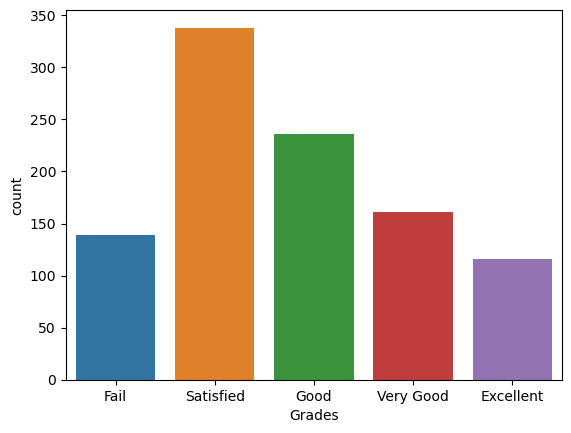

In [15]:
sns.countplot(x = data['Grades'],order=[0,1,2,3,4]).set_xticklabels(['Fail', 'Satisfied', 'Good', 'Very Good', 'Excellent'])

plt.show()

In [16]:
majority, minor_1, minor_2, minor_3, minor_4 = data["Grades"].value_counts()
print(majority, minor_1, minor_2, minor_3, minor_4)

338 236 161 139 116


In [17]:
# Oversample minority classes
df_minor_1 = data[data["Grades"] == 2].sample(majority - minor_1, replace=True)
df_minor_2 = data[data["Grades"] == 3].sample(majority - minor_2, replace=True)
df_minor_3 = data[data["Grades"] == 0].sample(majority - minor_3, replace=True)
df_minor_4 = data[data["Grades"] == 4].sample(majority - minor_4, replace=True)

# Concatenate oversampled minority samples with original DataFrame
data = pd.concat([df_minor_1, df_minor_2, df_minor_3, df_minor_4, data], axis=0)

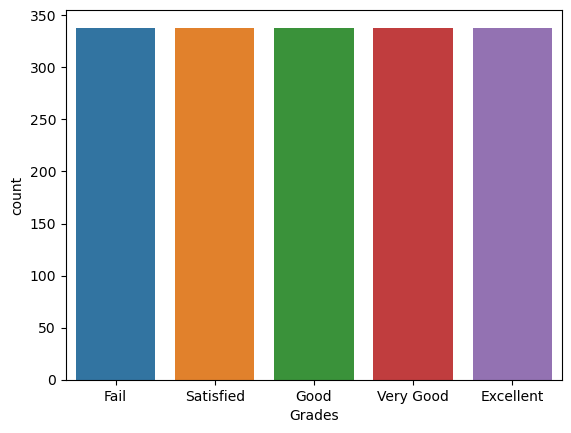

In [18]:
sns.countplot(x = data['Grades'],order=[0,1,2,3,4]).set_xticklabels(['Fail', 'Satisfied', 'Good', 'Very Good', 'Excellent'])

plt.show()

# Models to predict student's performance based on background

### Import neccessary libraries

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Define features and target

In [20]:
features = data.drop(["Grades", "G1", "G2", "G3"] , axis = 1).copy()
target = data['Grades'].copy()

### Split data to prepare for Machine Learning models

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [22]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred_dt = decision_tree_model.predict(X_test)

print("Decision Tree Classifier Classification Report:\n", accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier Classification Report:
 0.6745562130177515


### Random Forest Classifier

In [23]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

print("Random Forest Classifier Classification Report:\n", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Classification Report:
 0.6893491124260355


### Importance rate of features

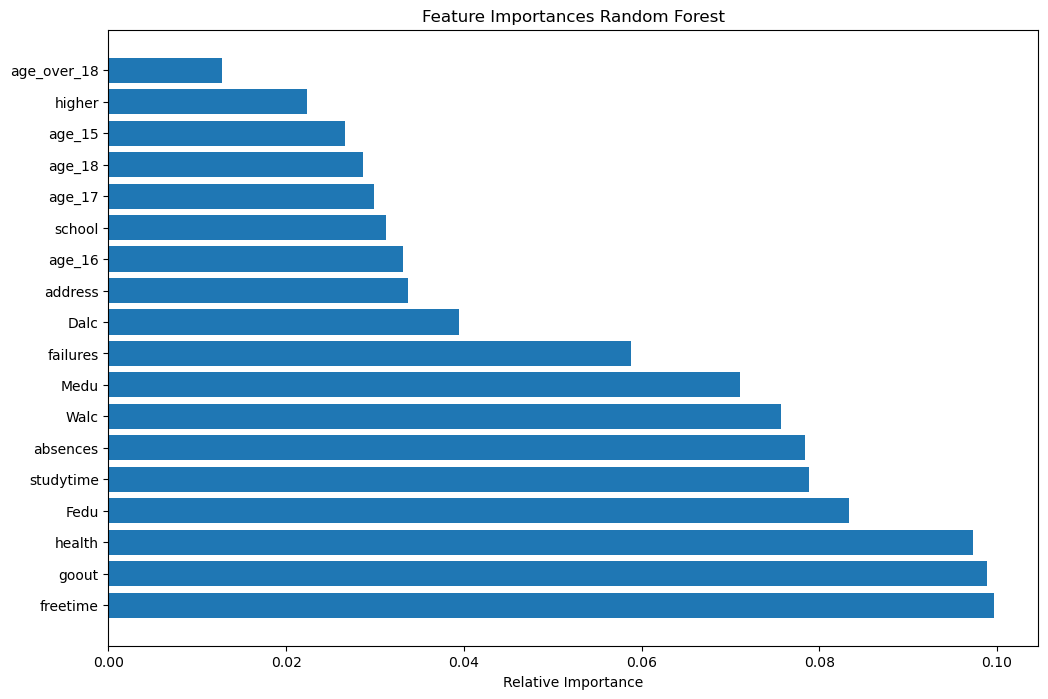

In [24]:
plt.figure(figsize=(12, 8))
plt.title('Feature Importances Random Forest')
importances_dt = random_forest_model.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]
plt.barh(range(len(indices_dt)), importances_dt[indices_dt], align='center')
plt.yticks(range(len(indices_dt)), [features.columns[i] for i in indices_dt])
plt.xlabel('Relative Importance')
plt.show()

### Support Vector Machine (SVM)

In [25]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Classifier Classification Report:\n", accuracy_score(y_test, y_pred_svm))

SVM Classifier Classification Report:
 0.41124260355029585


### K-Nearest Neighbors (KNN)

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("KNN Classifier Classification Report:\n", accuracy_score(y_test, y_pred_knn))

KNN Classifier Classification Report:
 0.44970414201183434


### Logistic Regression

In [27]:
logistic_regression_model = LogisticRegression(random_state=42, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

y_pred_lr = logistic_regression_model.predict(X_test)

print("Logistic Regression Classifier Classification Report:\n", accuracy_score(y_test, y_pred_lr))

Logistic Regression Classifier Classification Report:
 0.40532544378698226


### Gradient Boosting Classifier

In [28]:
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

y_pred_gb = gradient_boosting_model.predict(X_test)

print("Gradient Boosting Classifier Classification Report:\n", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classifier Classification Report:
 0.5266272189349113


# Models to predict student's performance based on background and past performances

From the above models, it is noted that the accuracy of predicting the education level based on background is not high. In order to fix these problems, we will add more data abour student's past performance by keeping 'G1', 'G2'.

Because we use the 'G1' - first period grade and 'G2' - second period grade, we will predict level of 'G3' - final grade instead of 'Total'.

In [29]:
conditions = [
    (data['G3'] <= 8),
    (data['G3'] > 8) & (data['G3'] <= 11),
    (data['G3'] > 11) & (data['G3'] <= 13),
    (data['G3'] > 13) & (data['G3'] <= 15),
    (data['G3'] > 15)
]
values = ['Fail', 'Satisfied', 'Good', 'Very Good', 'Excellent']

data['G3'] = np.select(conditions, values, default='')

In [30]:
# Mapping grades to numerical values
data["G3"] = data["G3"].map({"Fail": 0, "Satisfied": 1, "Good": 2, "Very Good": 3, "Excellent": 4})

In [31]:
features = data.drop(['Grades', 'G3'] , axis = 1).copy()
target = data['G3'].copy()

### Split data to prepare for Machine Learning models

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Random Forest

In [33]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

print("Random Forest Classifier Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91        69
           1       0.78      0.85      0.81        72
           2       0.79      0.83      0.81        54
           3       0.88      0.93      0.90        69
           4       0.99      0.92      0.95        74

    accuracy                           0.88       338
   macro avg       0.88      0.88      0.88       338
weighted avg       0.88      0.88      0.88       338



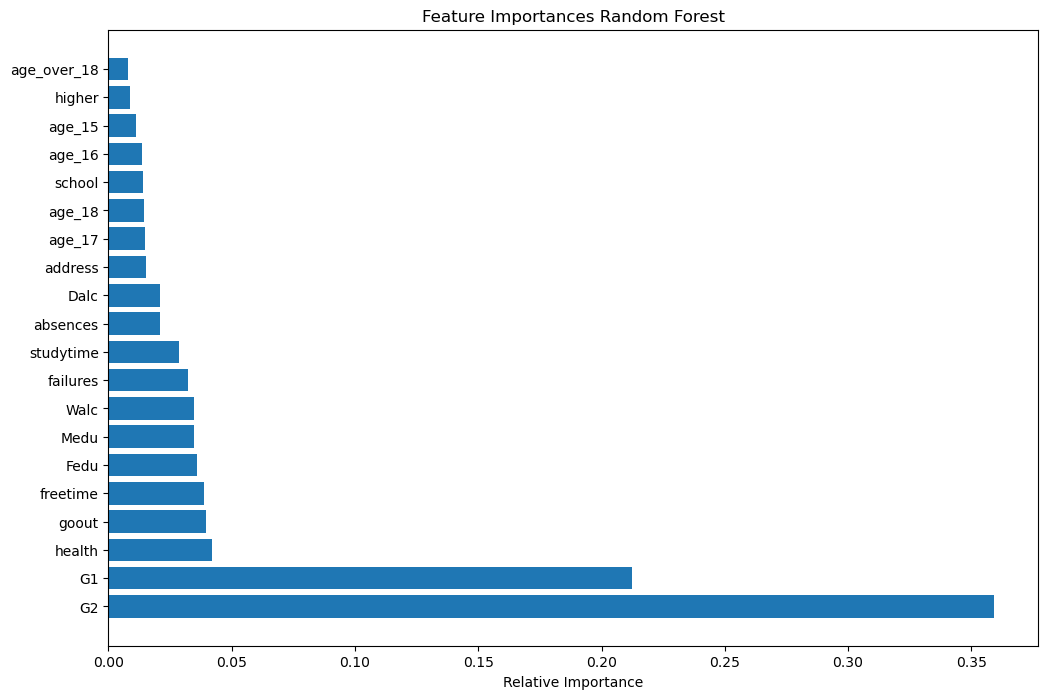

In [34]:
plt.figure(figsize=(12, 8))
plt.title('Feature Importances Random Forest')
importances_dt = random_forest_model.feature_importances_
indices_dt = np.argsort(importances_dt)[::-1]
plt.barh(range(len(indices_dt)), importances_dt[indices_dt], align='center')
plt.yticks(range(len(indices_dt)), [features.columns[i] for i in indices_dt])
plt.xlabel('Relative Importance')
plt.show()

### Other Machine Learning models

In [35]:
#Decision Tree 
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
print("Decision Tree Classifier Classification Report:\n", accuracy_score(y_test, y_pred_dt))
print()

#Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classifier Classification Report:\n", accuracy_score(y_test, y_pred_svm))
print()

#K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classifier Classification Report:\n", accuracy_score(y_test, y_pred_knn))
print()

#Logistic Regression
logistic_regression_model = LogisticRegression(random_state=42, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)
y_pred_lr = logistic_regression_model.predict(X_test)
print("Logistic Regression Classifier Classification Report:\n", accuracy_score(y_test, y_pred_lr))
print()

#Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
print("Gradient Boosting Classifier Classification Report:\n", accuracy_score(y_test, y_pred_gb))
print()

Decision Tree Classifier Classification Report:
 0.8609467455621301

SVM Classifier Classification Report:
 0.7603550295857988

KNN Classifier Classification Report:
 0.7218934911242604

Logistic Regression Classifier Classification Report:
 0.7514792899408284

Gradient Boosting Classifier Classification Report:
 0.8313609467455622

